In [147]:
import numpy as np
import dill
import importlib
import sys
import os
import matplotlib.pyplot as plt
'''
v4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3

As of 1/13/23, the only change is the addition of the decision to action delay
'''

'\nv4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3\n\nAs of 1/13/23, the only change is the addition of the decision to action delay\n'

In [148]:
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\Optimal Stopping') 
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\Simulations') 

import Optimal_Stopping_Object_v3_unknown_switch_delay
from Subject_Object import *
from plot_functions import *
importlib.reload(Optimal_Stopping_Object_v3_unknown_switch_delay) # Reloads so I don't have to restart kernel if I change a function in the Object of another py file
from Optimal_Stopping_Object_v3_unknown_switch_delay import *

# Initial Thangs

In [149]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\\Simulation_Figures\\Group\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'
tp3_title = "1000 (50)"
tp4_title = "1000 (150)"
tp5_title = '1100 (50)'
tp6_title = "1100 (150)"
tp7_title = "1200 (50)"
tp8_title = '1200 (150)'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
num_blocks = len(trial_block_titles)

# Pickle Data

In [150]:
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
subject_object_dict = dill.load((open(load_path + 'subject_object_dict.pkl', 'rb')))
group = dill.load((open(load_path + 'group_object.pkl', 'rb')))

# Pickle Numerical Model to Get Same Parameters

In [151]:
if 'group_simulation' not in locals():
    load_path = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Model Objects\Simulation_Objects\\'
    group_simulation = dill.load((open(load_path + 'group_sim_experiment_results.pkl', 'rb')))

# Create Model

In [152]:
group_simulation.reaction_time_mean

297.4022166041223

In [153]:
group_model = Optimal_Decision_Time_Model(reaction_time = group_simulation.reaction_time_mean, movement_time = group_simulation.movement_time_mean, incorrect_cost = 0,
                                          reaction_uncertainty = group_simulation.reaction_uncertainty, movement_uncertainty = group_simulation.movement_uncertainty,
                                          timing_uncertainty = group_simulation.timing_uncertainty,
                                          decision_action_delay_uncertainty = group_simulation.decision_to_action_delay_uncertainty, decision_action_delay_mean = group_simulation.decision_to_action_delay_mean,
                                          unknown_switch_delay = 150,
                                          
                                         )

[[ 40.70999     40.71013928  40.710289   ...  64.42938097  64.42938097
   64.42938097]
 [ 45.82039847  45.82911817  45.83785871 ... 155.40638699 155.40638699
  155.40638699]
 [ 40.69702038  40.69713313  40.69724618 ...  64.42938097  64.42938097
   64.42938097]
 [ 45.04383303  45.05075063  45.05768378 ... 155.40638407 155.40638418
  155.40638429]
 [ 40.68710903  40.68719622  40.68728362 ...  64.42938097  64.42938097
   64.42938097]
 [ 44.42358618  44.42914971  44.43472502 ... 155.40627339 155.40627721
  155.4062809 ]] [[ 395.34796888  396.34550319  397.34303263 ... 1397.83562231
  1397.83562231 1397.83562231]
 [ 376.24992828  377.22998325  378.21000265 ... 1397.83562229
  1397.83562229 1397.83562229]
 [ 395.5721909   396.57014814  397.56810169 ... 1497.83562231
  1497.83562231 1497.83562231]
 [ 378.07936018  379.06255514  380.04572238 ... 1497.83562128
  1497.83562132 1497.83562136]
 [ 395.75946077  396.75774107  397.75601852 ... 1597.83562231
  1597.83562231 1597.83562231]
 [ 379.63040

C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\Optimal Stopping\Optimal_Stopping_Object_v3_unknown_switch_delay.py:192: RuntimeWarning: invalid value encountered in divide
  self.perc_incorrects_that_were_reaction = (self.prob_incorrect_if_react*self.prob_selecting_reaction_optimal/self.prob_incorrect_calc)*100
C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\Optimal Stopping\Optimal_Stopping_Object_v3_unknown_switch_delay.py:193: RuntimeWarning: invalid value encountered in divide
  self.perc_incorrects_that_were_gamble = (self.prob_incorrect_if_gamble*self.prob_selecting_gamble_optimal/self.prob_incorrect_calc)*100


In [154]:
# group_model = Optimal_Decision_Time_Model(reaction_time = 300, movement_time = 100, incorrect_cost = 0,
#                                           reaction_uncertainty = 0.00001, movement_uncertainty = 0.00001,
#                                           timing_uncertainty = 0.00001,
#                                           decision_action_delay_uncertainty = 0.00001, decision_action_delay_mean = 50,
#                                          )

In [155]:
group_model.prob_making_reaction_optimal

array([0.94359404, 0.90054164, 0.8481996 , 0.86914292, 0.78411462,
       0.84281888])

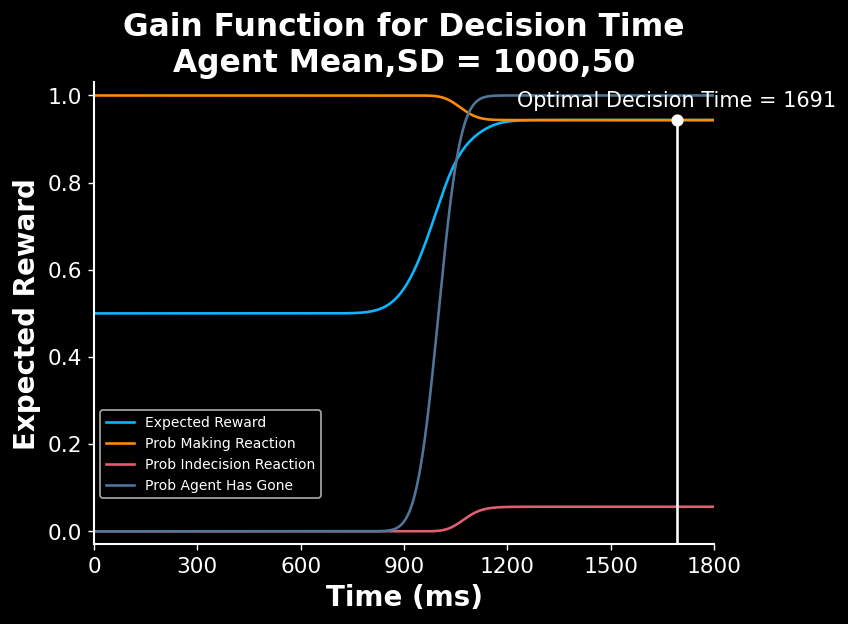

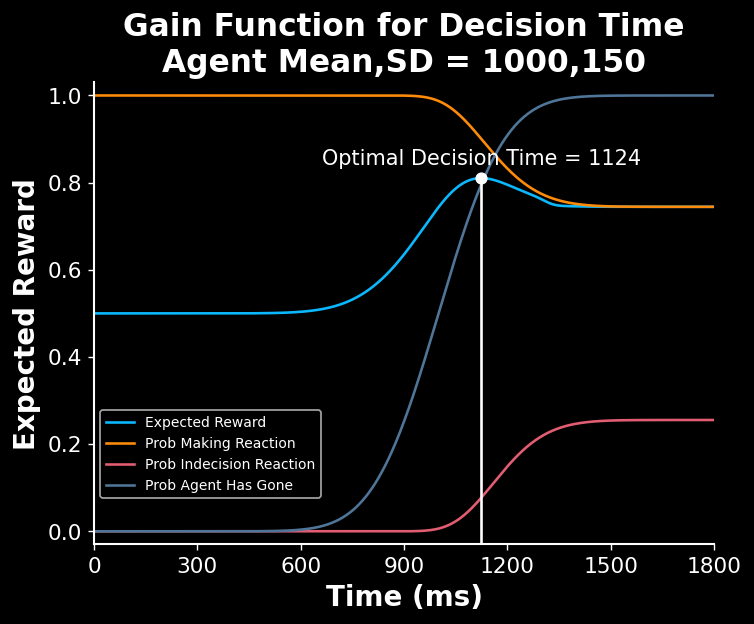

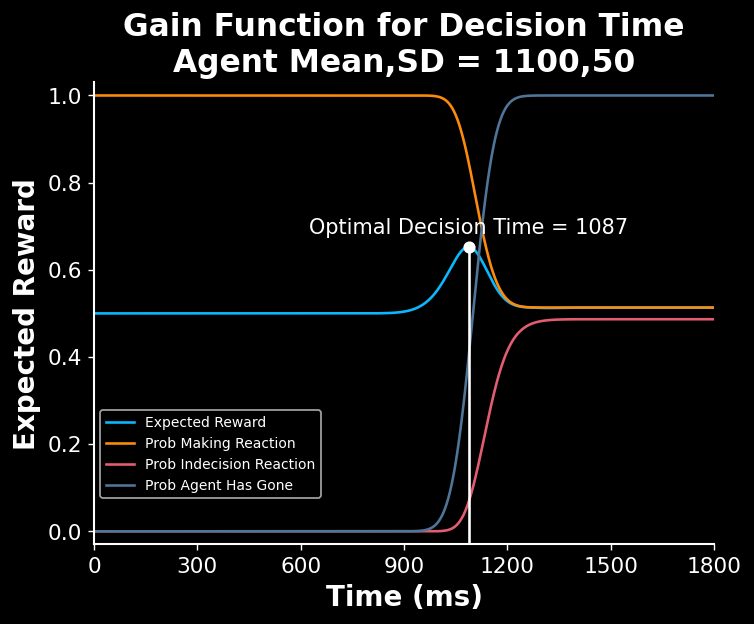

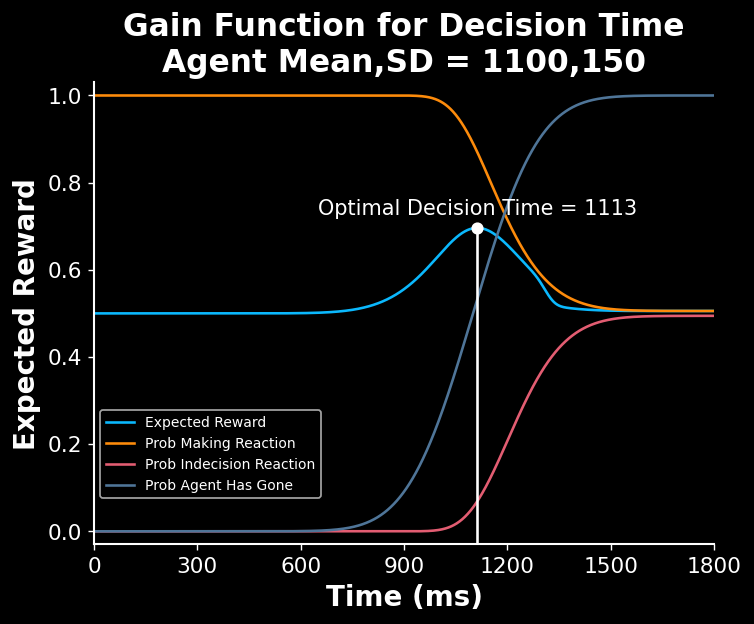

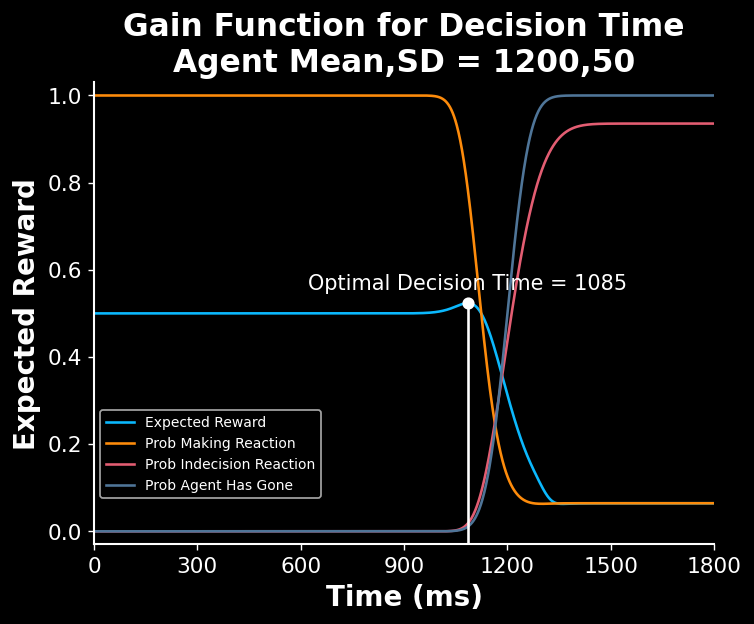

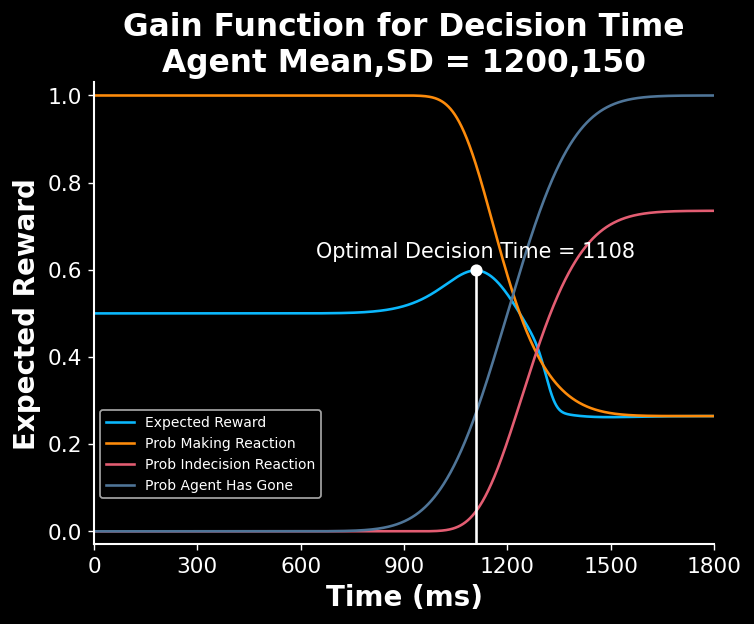

In [156]:
group_model.plot_optimals(metrics = ['exp_reward','prob_making_reaction','prob_indecision_reaction','prob_agent_has_gone'])#,'exp_reward_reaction','exp_reward_gamble','prob_selecting_reaction'])

# Plots

In [157]:
save = False

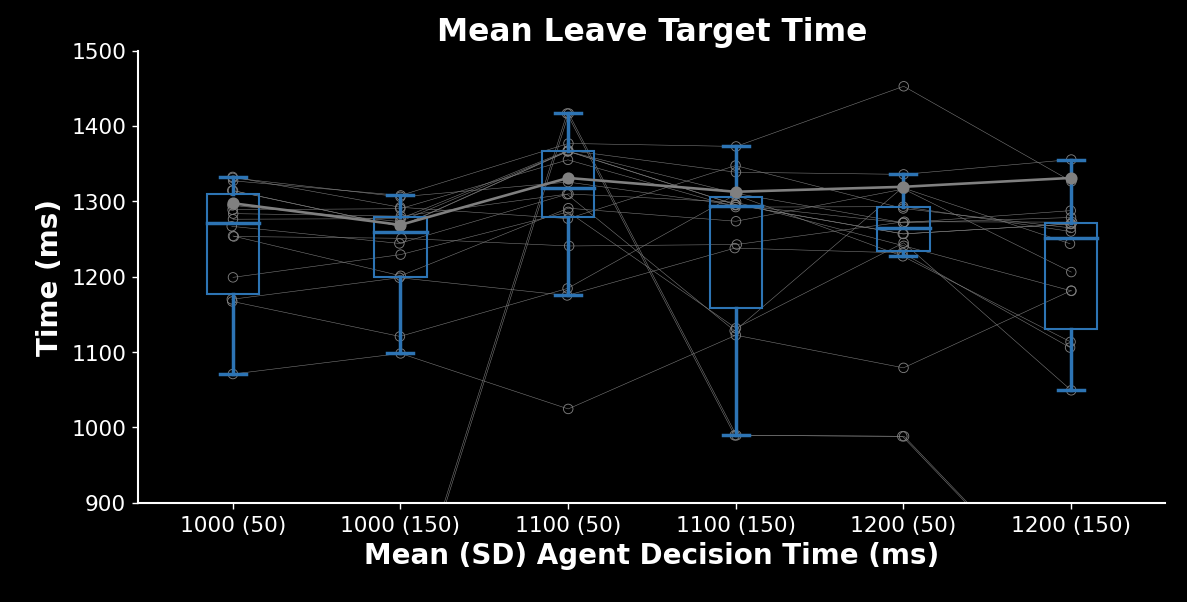

In [158]:
metric = group.combine_all_subjects('player_task_decision_time_mean') 
optimal_metric = group_model.wtd_optimal_leave_target_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Leave Target Time')
if save:
    axmain.set_axis_off()
    # plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Player Minus Agent Mean Leave Target Time

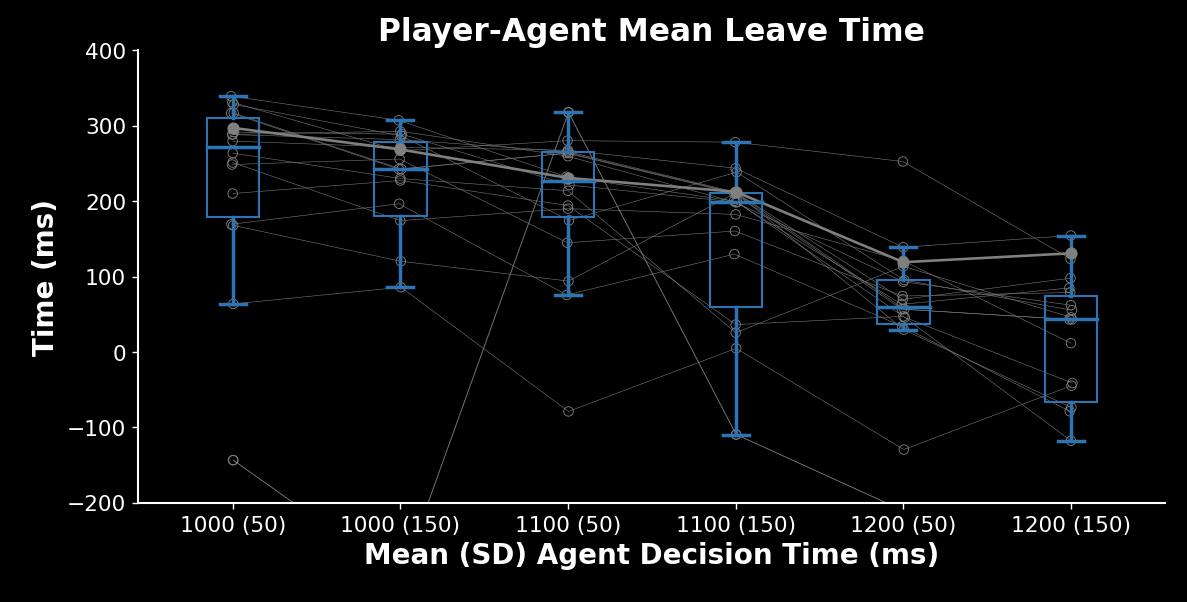

In [159]:
metric = group.combine_all_subjects('player_minus_agent_task_decision_time_mean') 
optimal_metric = group_model.player_minus_agent_leave_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(-200,500,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Player-Agent Mean Leave Time')
if save:
    axmain.set_axis_off()
    # plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

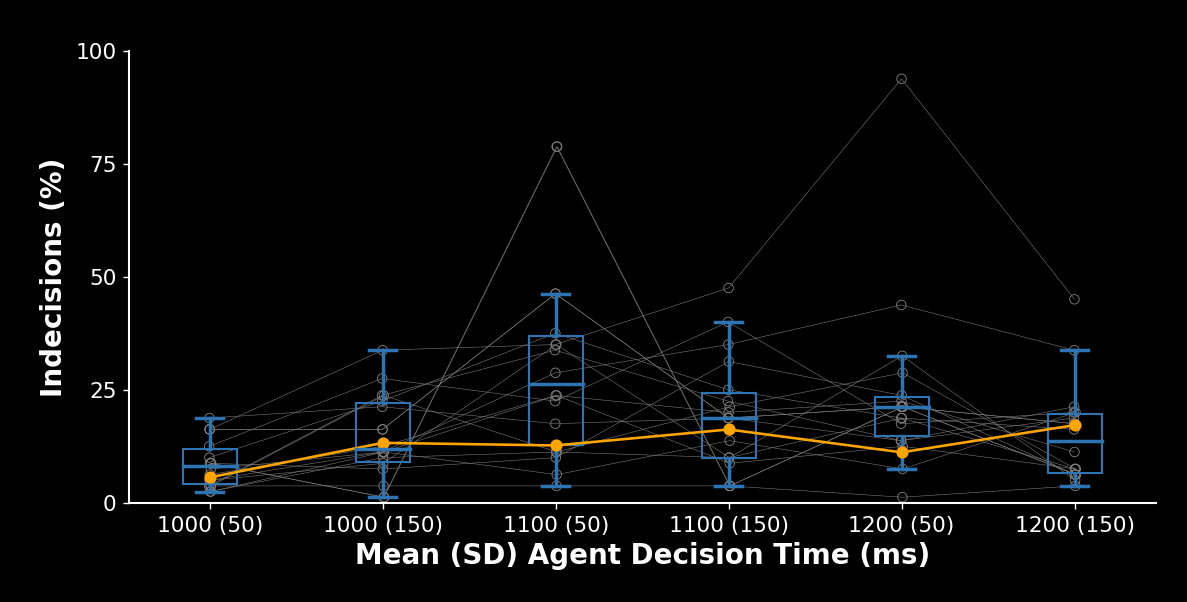

In [160]:
metric = group.combine_all_subjects('player_perc_indecisions') 
optimal_metric_calc = group_model.perc_indecision_calc

# optimal_metric = group_model.prob_indecision_based_on_reach_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric_calc,c='orange',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'indecisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

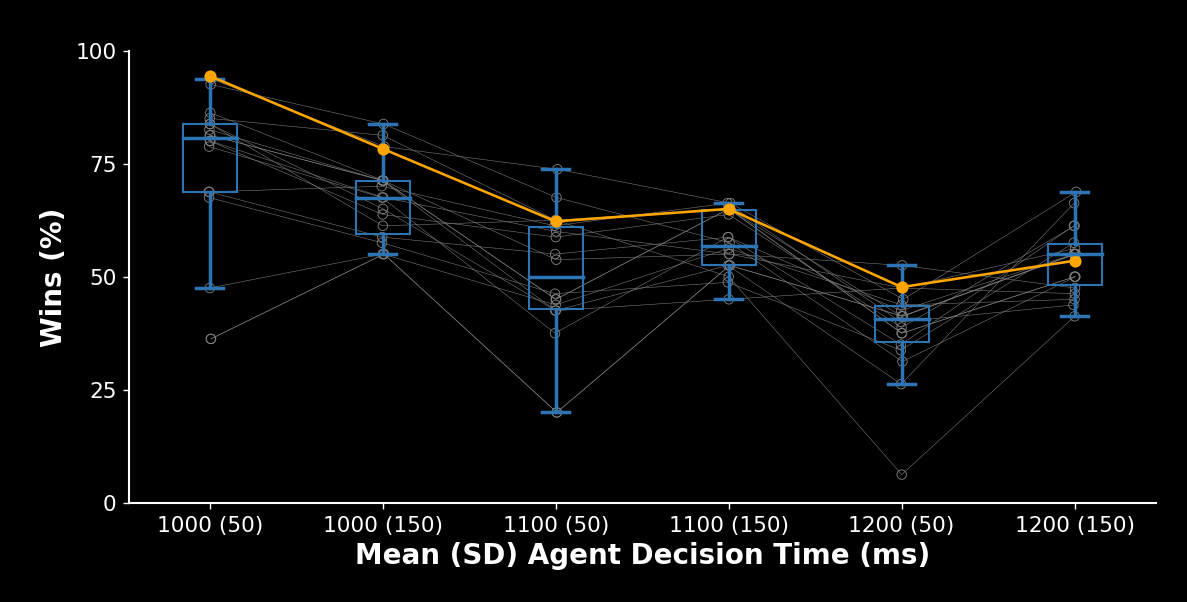

In [161]:
metric = group.combine_all_subjects('player_perc_wins') 
optimal_metric_calc = group_model.perc_win_calc

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric_calc,c='orange',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'wins_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

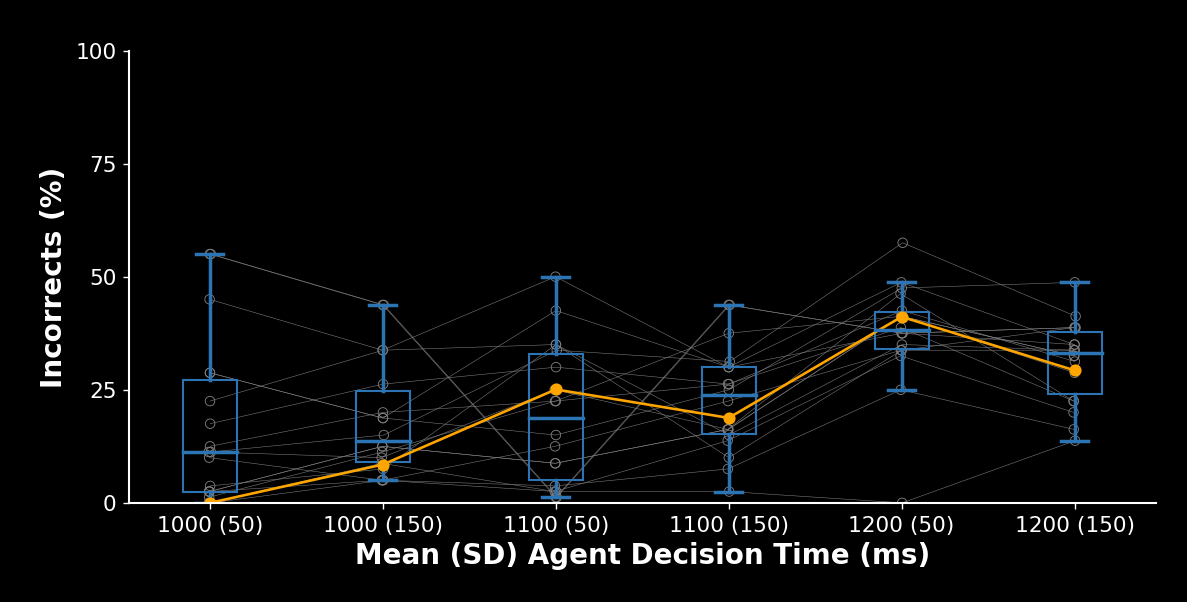

In [162]:
metric = group.combine_all_subjects('player_perc_incorrects') 
optimal_metric_calc = group_model.perc_incorrect_calc

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric_calc,c='orange',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Incorrects (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'incorrects_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Reaction and Gamble Decisions

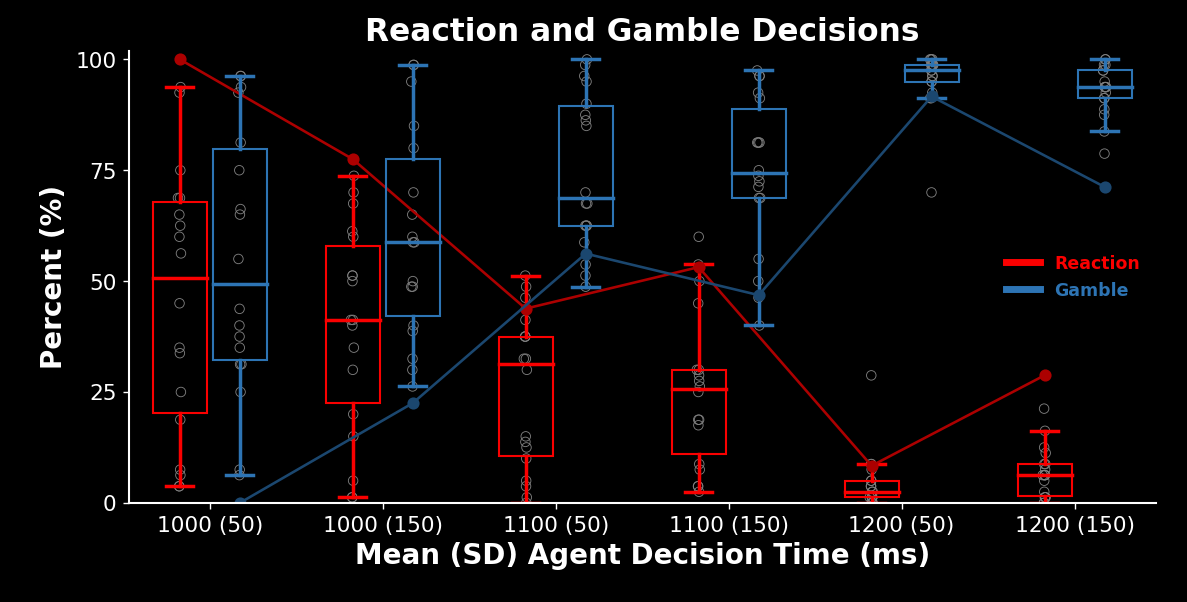

In [163]:
optimal_metric1 = group_model.prob_selecting_reaction_optimal*100
optimal_metric2 = group_model.prob_selecting_gamble_optimal*100
data_metric1 = group.combine_all_subjects('perc_reactions')
data_metric2 = group.combine_all_subjects('perc_gambles')

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decisions')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Reaction and Gamble Leave Times

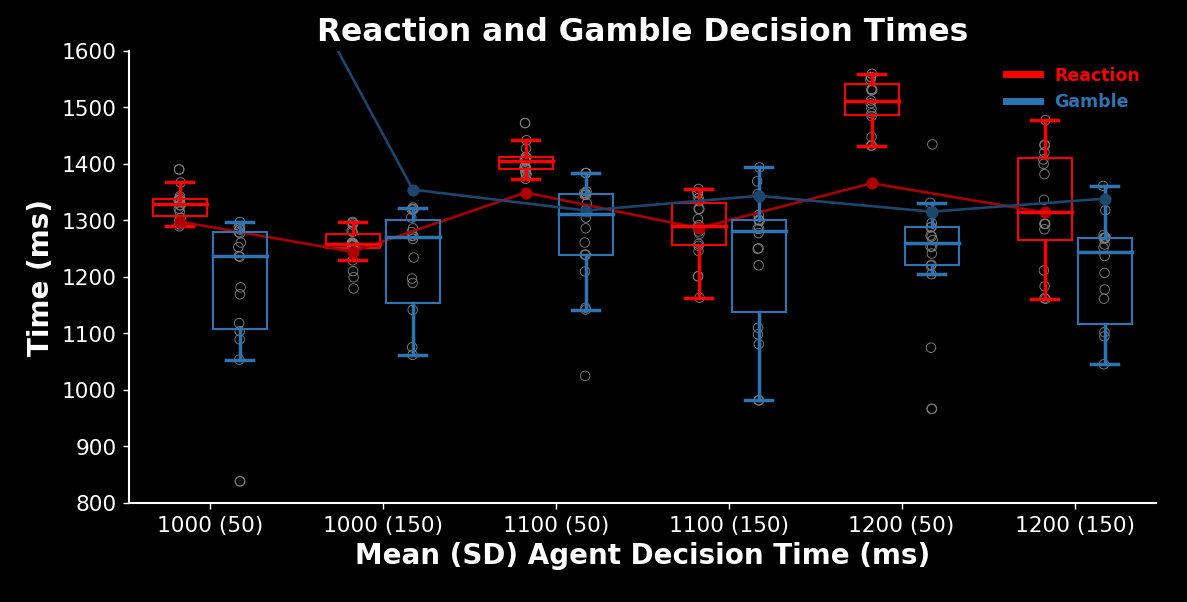

In [164]:
optimal_metric1 = group_model.optimal_reaction_leave_target_time
optimal_metric2 = group_model.optimal_gamble_leave_target_time
data_metric1 = group.combine_all_subjects('reaction_decision_time_mean')
data_metric2 = group.combine_all_subjects('gamble_decision_time_mean')

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(800,1700,100)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decision Times')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decision_times_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Percent wins that were reaction and gamble

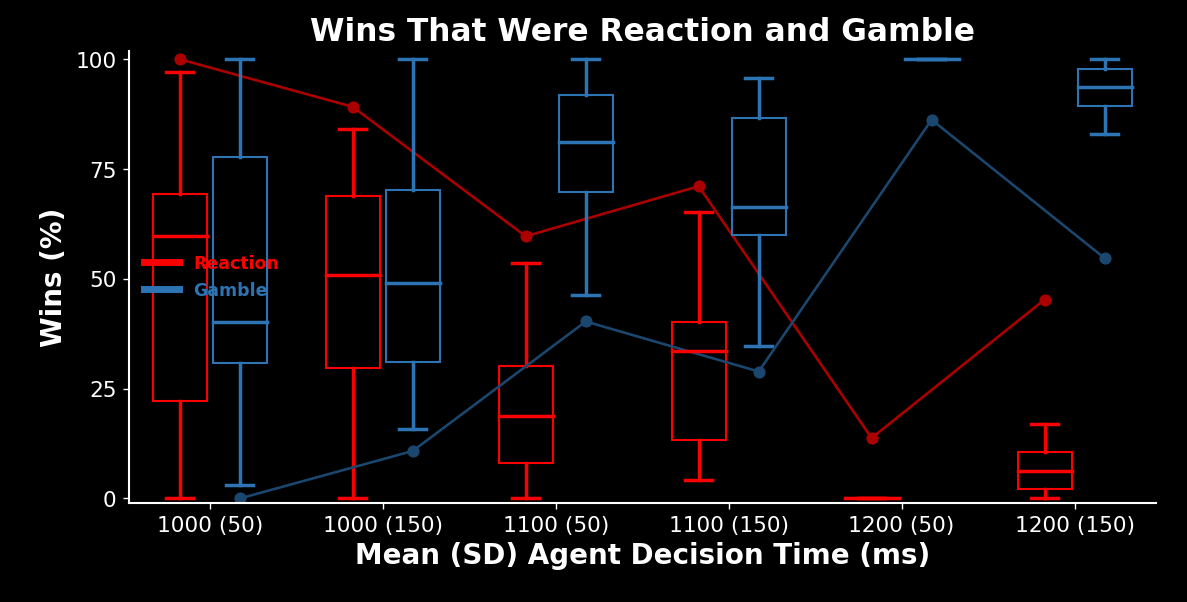

In [165]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
metric1 = group.combine_all_subjects('perc_wins_that_were_reactions') 
metric2 = group.combine_all_subjects('perc_wins_that_were_gambles') 
optimal_metric1 = group_model.perc_wins_that_were_reaction
optimal_metric2 = group_model.perc_wins_that_were_gamble
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Wins That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Percent Indecisions That Were Gambles

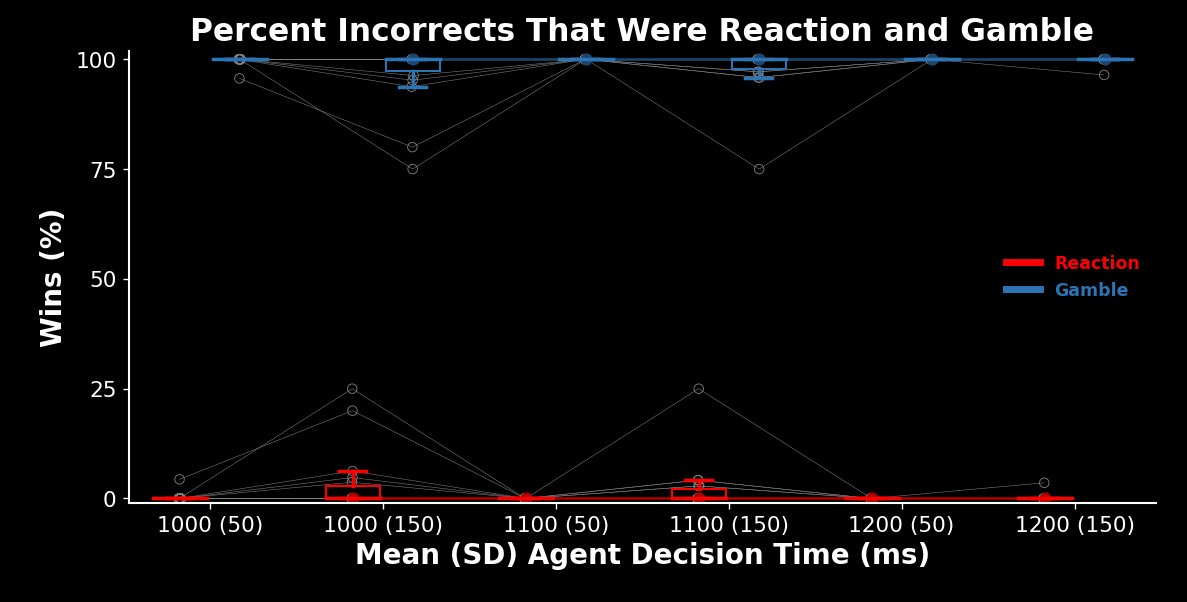

In [166]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
metric1 = group.combine_all_subjects('perc_incorrects_that_were_reactions') 
metric2 = group.combine_all_subjects('perc_incorrects_that_were_gambles') 
optimal_metric1 = group_model.perc_incorrects_that_were_reaction
optimal_metric2 = group_model.perc_incorrects_that_were_gamble
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Incorrects That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Percent Indecisions That Were Reaction and Gamble

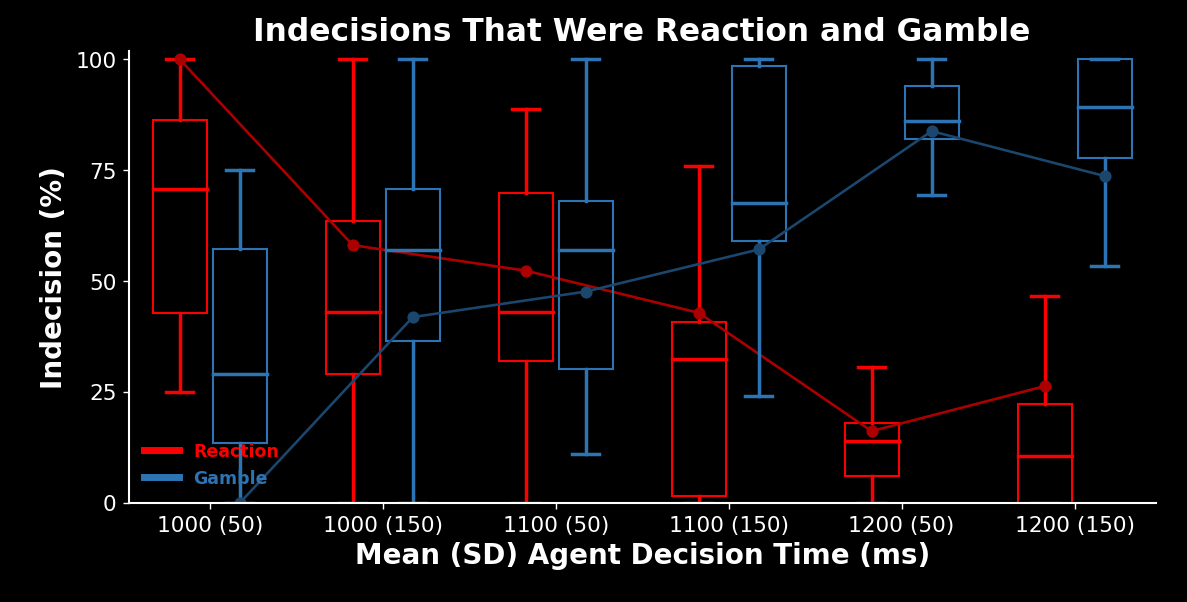

In [167]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
metric1 = group.combine_all_subjects('perc_indecisions_that_were_reactions') 
metric2 = group.combine_all_subjects('perc_indecisions_that_were_gambles') 
optimal_metric1 = group_model.perc_indecisions_that_were_reaction
optimal_metric2 = group_model.perc_indecisions_that_were_gamble
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Indecision (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Indecisions That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'reaction_and_gamble_indecisions', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()